# Same or Different Inspector: Any Bias?

# Overview

My hypothesis was rejected. The analysis is very simple, a unpaired t-test. Since the p-value exceeded the alpha value. The conclusion was that there isn't a statistically significant difference between in the number of critical risk factor reported by different inspectors and the number of critical risk factor report by the same inspector.

# Name & PID

- Name: Brittney
- PID: A15056364

# Research Question

Are restaurants—that are previously inspected by the same inspector —more likely to have more critical citations compared to restaurants that are inspected by a different inspector?

## Background and Prior Work

Food health and sanitation inspection standards aren't singular, meaning facilities are not inspected on the same basis. According to counties in North Carolina, inspection on facilites are categorized into four risk category based on what kind of food is provided and how the food is prepared or processed. The number of visitation per year also depends on the risk category--the higher the risk category, the more frequent the visits. Thus, public health inspectors need to keep up with these standards. 

The length and types of visits depends on the type of facility, the risk category, and other factors, plus health inspectors often do multiple inspection per day. These assessments are for the safety for the public, so it’s important that the inspection scores reflect the risk of food-borne illness. The ones who score and inspect facilities are people so they too are prone to biases or human factors such as fatigue. A study from Harvard says that the time of when the inspector visits a facility is related to how much violation is found. Health inspectors cite less violations as the day progresses or when working later in the day. They also found that inspectors find more violation in one location will more likely exhibit more scrutiny to the next location. Therefore, the study suggests that health inspector’s bias and behavior are related to scheduling which impacts the inspection results.

References (include links):
1)https://hbswk.hbs.edu/item/a-simple-way-for-restaurant-inspectors-to-improve-food-safety
2)http://data-wake.opendata.arcgis.com/datasets/food-inspection-violations?selectedAttribute=CRITICAL

# Hypothesis


Restaurants—that are inspected by the same inspector previously—on average are more likely to have less critical citations compared to restaurants that are inspected by different inspectors. If inspection are consistently done by the same inspector, perhaps the inspector may exhibit some bias just based on inspection in restaurant they are more familiar with.

# Dataset

- Dataset Name: Inspections
- Number of observations: 18466

This dataset contains information of regarding the food inspection report. It includes food inspection score reports or each respective facility in the state of North Carolina

# Setup

In [542]:
# Display plots directly in the notebook instead of in a new window
%matplotlib inline

#import libraries
import pandas as pd
import numpy as np

#for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", font_scale=2)

#for conducting t-test
from scipy.stats import ttest_ind
import scipy.stats as stats

# plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)


import warnings
warnings.filterwarnings('ignore')

# Data Cleaning

In [543]:
#import data
df = pd.read_csv('inspections.csv')

#Taking certain columns to take general look at the data
insp_df = df[['inspector_id', 'address1', 'facilitytype', 'name', 'previous_inspection_by_same_inspector','num_critical', 'num_non_critical','score' ]]
insp_df = insp_df[df.facilitytype == 'Restaurant']
insp_df = insp_df.rename(columns ={'address1':'address'})

#delete at end
pd.reset_option('display.max_rows')


In [544]:
insp_df

,inspector_id,address,facilitytype,name,previous_inspection_by_same_inspector,num_critical,num_non_critical,score
0,27.0,3000 New Bern Ave,Restaurant,Cafe 3000 At Wake Med,NaN,9,7,96.0
1,7.0,1030-149 N Rogers Ln,Restaurant,Overtime Sports Pub,NaN,0,11,98.0
2,3.0,6209 ROCK QUARRY RD,Restaurant,TASTE OF CHINA,NaN,4,8,97.0
3,24.0,1065 Darrington DR,Restaurant,Panera Bread #1643,NaN,2,3,99.0
6,18.0,3215 AVENT FERRY RD,Restaurant,Pearl Chinese Restaurant,NaN,6,7,96.0
...,...,...,...,...,...,...,...,...
18453,13.0,5160 SUNSET LAKE RD,Restaurant,ARCHIBALD`S TAVERN,False,2,7,93.5
18454,5.0,1910 ENTREPRENUUR,Restaurant,THE OVAL,False,3,6,97.0
18455,1.0,904 NE MAYNARD RD,Restaurant,AWAZ'E ETHIOPIAN/ERITREAN CUISINE,False,3,5,97.0
18456,8.0,326 HILLSBOROUGH ST,Restaurant,TAVERNA AGORA,False,3,6,96.0


At first look, the data needs to be cleaned up as evidence of the NaN values. To further explore the data, I standardized name and address, so grouping the variable would be easier.

In [545]:
#Standardizing address

def standardize_address(address):
    address = address.upper()
    address = address.strip()
    
    address = address.replace('.', '')
    
    address = address.replace('LANE', 'LN')
    address = address.replace('DRIVE', 'DR')
    address = address.replace('ROAD', 'RD')
    address = address.replace('STREET', 'ST')
    address = address.replace('AVENUE', 'AVE')
    address = address.replace('BOULEVARD', 'BLVD')
    address = address.replace('BLV ', 'BLVD')
    address = address.replace('CIRCLE', 'CIR')
    
    address = address.replace('WEST', 'W')
    address = address.replace('NORTH', 'N')
    address = address.replace('SOUTH', 'S')
    address = address.replace('EAST', 'E')

    
    return address

#checking output
print(standardize_address('W. Main Street'))

#applying standardization
insp_df['address'] = insp_df['address'].apply(standardize_address)

W MAIN ST


Next, standardizing names which is less compared to address. This standardization the name as much as address because I only needed enough standardization to look at the overall dataset. I wasn't going to merge with another dataset, so I chose not to standardize strictly. 

In [546]:

def standardize_name(name):
    name = name.upper()
    name = name.strip()
    
    return name

#applying standardization
insp_df['name'] = insp_df['name'].apply(standardize_name)

In [547]:
#checking for missing values
insp_df.isna().any()

#dropping rows with missing values 
insp_df = insp_df.dropna()

#converting column to bool
insp_df['previous_inspection_by_same_inspector'] = df['previous_inspection_by_same_inspector'].astype(bool)
insp_df.dtypes

#creating dataframe for restaurants previously inspected with the same inspector
same_df = insp_df[insp_df.previous_inspection_by_same_inspector == True]

#creating dataframe for restaurants inspected by a different inspector
diff_df = insp_df[insp_df.previous_inspection_by_same_inspector == False]

In [548]:
table = pd.pivot_table(insp_df, values = 'num_critical', index = ['previous_inspection_by_same_inspector','name', 'address', 'inspector_id'])
pd.options.display.max_rows = None
table

num_critical
previous_inspection_by_same_inspector name                                               address                                inspector_id              
False                                 #1 CHINA                                           764 W WILLIAMS ST                      10.0              0.000000
                                                                                                                                22.0              3.000000
                                                                                                                                31.0              3.000000
                                      #1 CHINA WOK                                       942 GATEWAY COMMONS CIR                7.0               7.000000
                                                                                                                                29.0              2.000000
                                      115 MIDTOWNE                                       4421-115 SIX FORKS RD                  6.0               2.000000
                                                                                                                                29.0              1.000000
                                      1250 HERITAGE                                      1250 HERITAGE CLUB AVE                 7.0               4.000000
                                      1705 PRIME CATERING AND EVENTS                     1705 E MILLBROOK RD                    14.0              2.000000
                                                                                                                                20.0              1.000000
                                                                                                                                21.0              0.000000
                                                                                                                                27.0              7.000000
                                      18 SEABOARD                                        18 SEABOARD AVE                        8.0               2.000000
                                                                                                                                16.0              1.500000
                                      1853 GRILLE                                        1025 BLUE RIDGE RD                     5.0               1.000000
                                                                                                                                10.0              1.000000
                                                                                                                                25.0              7.000000
                                      1887 BISTRO                                        2610 CATES AVE                         5.0               1.000000
                                      42ND ST OYSTER BAR                                 508 W JONES ST                         11.0              5.000000
                                                                                                                                18.0              6.000000
                                                                                                                                23.0              3.000000
                                      4TH FLOOR CAFE                                     310 NEW BERN AVE                       8.0               5.000000
                                                                                                                                16.0              4.000000
                                      510 TAVERN                                         510-101 GLENWOOD AVE                   23.0              4.000000
                                      701 CAFE                                           701 CORPORATE CENTER DR

In [549]:
pd.reset_option('display.max_rows') #remove at the end

In [550]:
#checking data distribution for any need for transformation

Inspected Previously by Same Inspector
       inspector_id  num_critical  num_non_critical        score
count   6234.000000   6234.000000       6234.000000  6234.000000
mean      12.994867      3.207571          5.642284    95.589429
std        9.098158      3.106676          3.796912     2.757162
min        1.000000      0.000000          0.000000    72.500000
25%        5.000000      1.000000          3.000000    94.000000
50%       10.000000      2.000000          5.000000    96.000000
75%       22.000000      5.000000          7.000000    97.500000
max       32.000000     22.000000         33.000000   100.000000
 


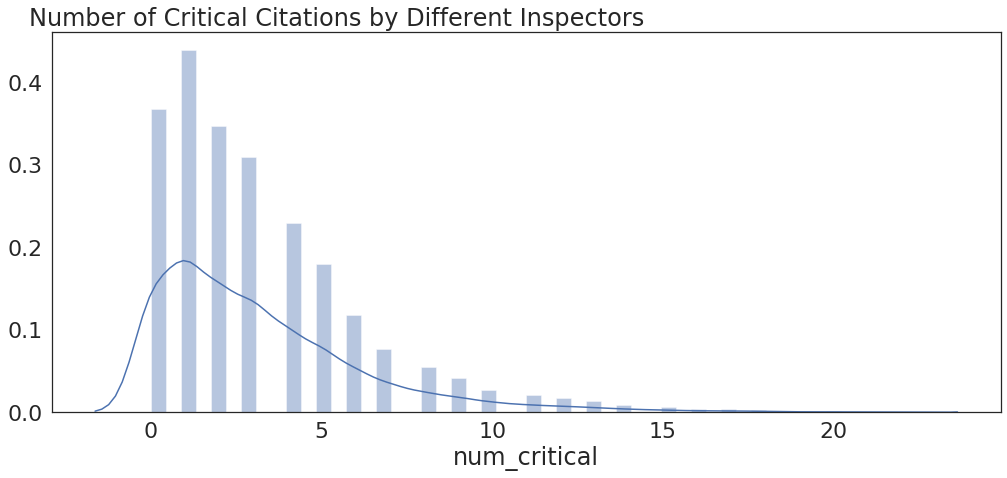

In [551]:
#distribution of same inspectors
sns.distplot(same_df['num_critical']).set_title('Number of Critical Citations by Different Inspectors', x = 0.3)

print('Inspected Previously by Same Inspector')
print(same_df.describe())
print(' ')

Inspected by Different Inspector
       inspector_id  num_critical  num_non_critical        score
count   3693.000000   3693.000000       3693.000000  3693.000000
mean      14.251557      3.240455          6.252099    95.445708
std        8.971776      2.925699          3.870685     2.739546
min        1.000000      0.000000          0.000000    75.000000
25%        6.000000      1.000000          4.000000    94.000000
50%       13.000000      3.000000          6.000000    96.000000
75%       22.000000      5.000000          8.000000    97.500000
max       32.000000     23.000000         32.000000   100.000000


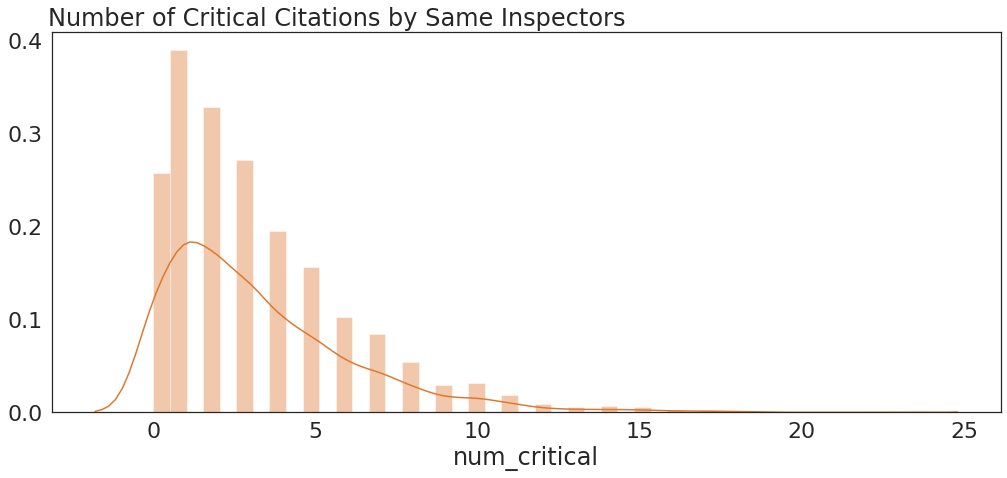

In [552]:
#plt.hist(diff_df['num_critical'],bins = 23)
sns.distplot(diff_df['num_critical'], color = '#de772f').set_title('Number of Critical Citations by Same Inspectors', x = 0.3)

print('Inspected by Different Inspector')
print(diff_df.describe())

Both distribution are skewed to the right and the spread is pretty wide when you look at standard deviation of both distribution. 

In [553]:
#data transformation using log to use for data analysis

same_df = same_df.assign(num_critical10 = same_df['num_critical']+1)
diff_df = diff_df.assign(num_critical10 = diff_df['num_critical']+1)

same_df['num_critical10'] = np.log10(same_df['num_critical10'])
diff_df['num_critical10'] = np.log10(diff_df['num_critical10'])


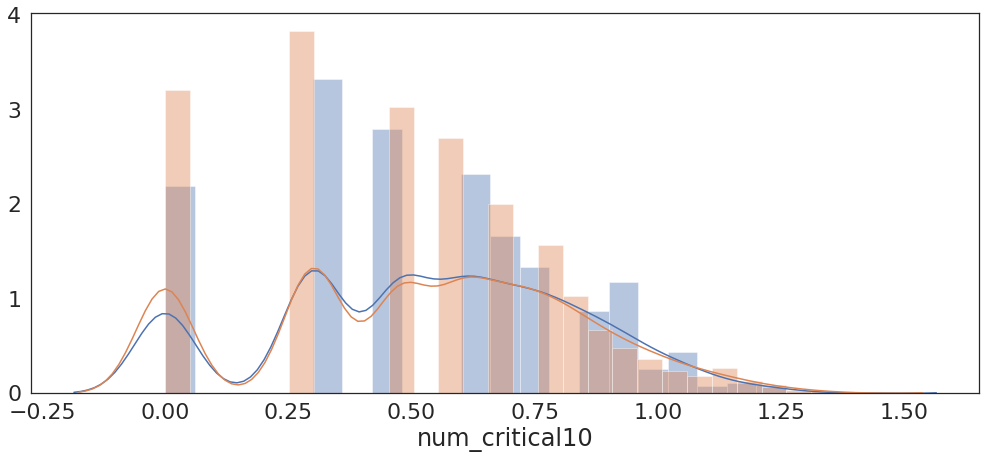

In [554]:
#plotting both distribution in one graph
sns.distplot(diff_df['num_critical10'])
sns.distplot(same_df['num_critical10'])


Data is closer to normal distribution, but now there is signs or bimodality in the distribution or some form of outlier.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f57223bd828>,
      dtype=object)

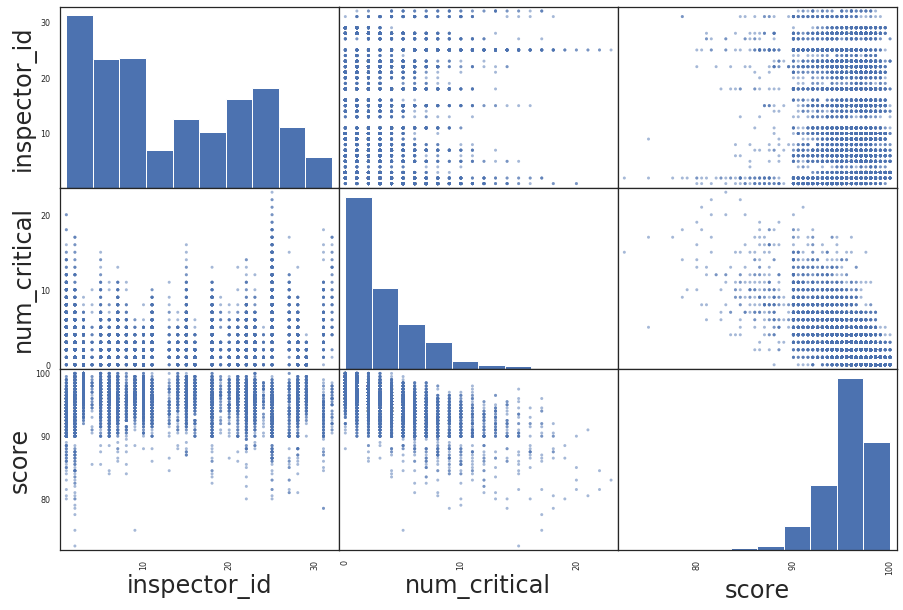

In [555]:
pd.plotting.scatter_matrix(insp_df[['inspector_id','num_critical', 'score']], figsize = (15,10))


Out of the three variables displayed on the scatter matrix. There's a relationship between score and num_critical which makes sense as scores are higher, there are less critical citations.

# Data Analysis

In [556]:
#using t-test to compare 
same_crit = same_df['num_critical10']
diff_crit = diff_df['num_critical10']

t_val, p_val = stats.ttest_ind(diff_crit,same_crit)

print(t_val)
print(p_val)



2.194639532670395
0.02821255085512604


Using a alpha level of 0.01, the p-value is 0.02821 meaning that we fail to reject the null hypothesis that there is no difference between  in the number of critical risk factor reported for different inspectors and the same inspectors.

In short, there is no statically significant difference.


# Ethics & Privacy

There was no explicit permission to use this data. Although inspection report--done by public health inspector--are open to the public. To attain explicit permission, I could ask the local county to where the information was attained and ask for permission to use information.

The only privacy concern with the data shown is the inspector's ID, anyone can look up their ID and find their full name online. Otherwise, all other data shown are compliant with the Safe Harbor method for this report.   

# Conclusion & Discussion

My research question is whether restaurants—that are previously inspected by the same inspector —more likely to have more critical citations compared to restaurants that are inspected by a different inspector. 
Based on the analysis using the data--the average number of critical citation done by different inspectors and the average number of critical citation done by the same inspector--my hypothesis that there is a significant difference was rejected. One reason maybe due to the way I grouped my data. Instead of taking the scores of the inspection report and dividing by the inspector, I could've have divided the data by restaraunts that exclusively only have the same inspector and restaurants that only have different inspector upon each inspection, thus having a more distinct groups to analyze.  

Even if group the data better, my analysis is very simple, and only touches on the surface of the dataset. It only concluded that there isn't a statistically significant difference between  in the number of critical risk factor reported by different inspectors and the number of critical risk factor report by the same inspector.Evidence from the t-test only implies that the same inspectors tend to give different scores compared to different inspectors. The t-test doesn't give predictive evidence, so there needs to be more analysis, through regression model, to determine whether the same or different inspectors are more likely to give certain scoring or citations.

Another thing to note is the distribution of the data, even after the transformation, the distribution appears to be bimodal, thus there is an underlying data that maybe influences the distribution of the number of critical citations. This could also be done using a regression model and measuring the effect size of different variables.

